## <font color='blue'>Project objective</font>  
- The aim of this project is to build ML model which can recognize digits with high accuracy.

<img align="left" width="600" src="https://miro.medium.com/max/372/1*AO2rIhzRYzFVQlFLx9DM9A.png">

## Project description
- A dataset of 70,000 images of numbers ranging between 0-9 is given.
- Each is image is composed of 784 features (28x28 pixels).  
- ANN model was tested using MLP classifier with one hidden layer of 16 neurons.
- RNN model was tested using 32 filters with kernel size (5,5). 
- Dimensionality reduction was executed using PCA method

### Importing Libraries

In [181]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

### Combining train and test

In [182]:
df1 = pd.read_csv("mnist_train.csv")
df2 = pd.read_csv("mnist_test.csv")

In [183]:
col_name = [str(x) for x in list(range(df1.shape[1]))]
df1.columns = col_name
df2.columns = col_name

In [184]:
df = pd.concat([df1, df2], axis=0).reset_index()
df.drop(['index'], axis=1, inplace=True)
df.rename(columns = {'0':'digit'}, inplace=True)

### Basic Exploration

In [185]:
df.head(2)

,digit,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [186]:
df.shape

(69998, 785)

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69998 entries, 0 to 69997
Columns: 785 entries, digit to 784
dtypes: int64(785)
memory usage: 419.2 MB


#### Are there any null values?

In [188]:
df.isna().sum().sum()

0

#### Are the calasses balanced?

In [189]:
# Let's look at the percent of each class
round(100*df.digit.value_counts()/df.shape[0], 2)

1    11.25
7    10.42
3    10.20
2     9.99
9     9.94
0     9.86
6     9.82
8     9.75
4     9.75
5     9.02
Name: digit, dtype: float64

The classes percentage ranges between 9-11.25% (pretty balanced)

## Building the Models

### First model - MLP classifier

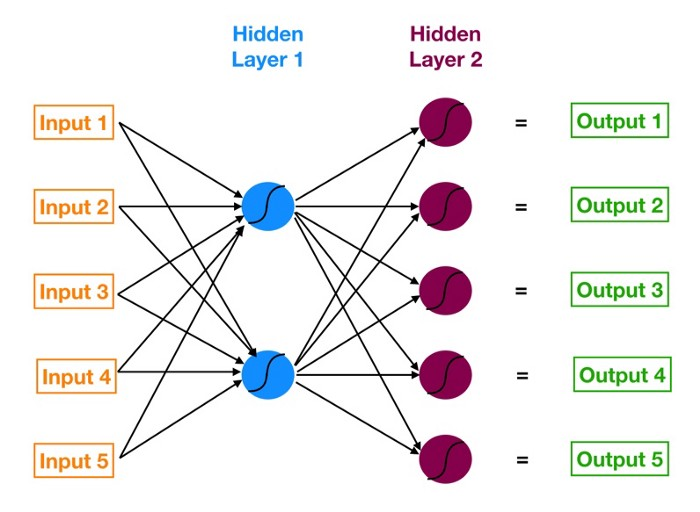

In [190]:
from IPython.display import Image
Image(filename='NN.jpeg',width=600)

In [191]:
import sklearn.neural_network as sknet
import sklearn.model_selection as skmodel

In [192]:
X_train, X_test, y_train, y_test = skmodel.train_test_split(df.drop('digit',axis=1),
                                                            df['digit'], test_size=0.2, random_state=101)

In [193]:
model = sknet.MLPClassifier(hidden_layer_sizes=([32]), max_iter=100, verbose=True)

In [196]:
model.fit(X_train,y_train)

Iteration 1, loss = 3.76551986
Iteration 2, loss = 1.28200953
Iteration 3, loss = 0.97912561
Iteration 4, loss = 0.78919362
Iteration 5, loss = 0.63405844
Iteration 6, loss = 0.52926728
Iteration 7, loss = 0.45547708
Iteration 8, loss = 0.40575613
Iteration 9, loss = 0.36814286
Iteration 10, loss = 0.32706963
Iteration 11, loss = 0.30240833
Iteration 12, loss = 0.27385308
Iteration 13, loss = 0.25337885
Iteration 14, loss = 0.23835567
Iteration 15, loss = 0.22803011
Iteration 16, loss = 0.22158820
Iteration 17, loss = 0.21036172
Iteration 18, loss = 0.20124939
Iteration 19, loss = 0.20025878
Iteration 20, loss = 0.18851128
Iteration 21, loss = 0.19221263
Iteration 22, loss = 0.18384838
Iteration 23, loss = 0.17692440
Iteration 24, loss = 0.17709575
Iteration 25, loss = 0.17143781
Iteration 26, loss = 0.16826237
Iteration 27, loss = 0.16270624
Iteration 28, loss = 0.15874772
Iteration 29, loss = 0.15471574
Iteration 30, loss = 0.14607326
Iteration 31, loss = 0.14808531
Iteration 32, los

C:\Users\User\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=[32], max_iter=100, verbose=True)

In [197]:
pred = model.predict(X_test)

Accuracy for the 10 first samples

In [198]:
pred[:10]

array([1, 6, 4, 2, 7, 6, 0, 1, 6, 7], dtype=int64)

In [199]:
y_test[:10].values

array([1, 6, 4, 2, 7, 6, 0, 1, 6, 7], dtype=int64)

In [200]:
np.mean((pred[:10] == y_test[:10].values))

1.0

### Accuracy for the entire dataset

In [201]:
def model_acc(model, X_train, X_test, y_train, y_test):
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    acc_train = round(100*(1 - np.mean(pred_train != y_train)), 2)
    acc_test = round(100*(1 - np.mean(pred_test != y_test)), 2)
    
    print('Train accuracy: ', acc_train)
    print('Test accuracy:  ', acc_test)

In [202]:
model_acc(model, X_train, X_test, y_train, y_test)

Train accuracy:  97.47
Test accuracy:   94.09


### Choose a random sample from the test set
- What is the true label?
- What is the predicted label?
- Calculate the three highest probabilities.
- Plot an image of the number.

Random index: 12000
The real number:  9
Predicted number: 9
The probabilities are:
9 87.25
4 8.58
7 1.7


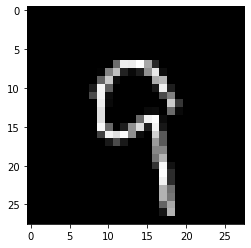

In [207]:
rec = np.random.randint(0, len(X_test))
print("Random index:", rec)
print("The real number: ", y_test[rec:rec+1].values[0])
print("Predicted number:",pred[rec])
pic_true = X_test[rec:rec+1].values.reshape(784)[0:].reshape(28,28)
plt.imshow(pic_true, cmap='gray')

s1 = model.predict_proba(X_test)[rec:rec+1]
s1_org = s1.copy()
print("The probabilities are:")
N_draw = 3
for i in range(N_draw):
    curr = s1.argmax()
    prob = round(100*s1_org[0, curr]/s1_org.sum(), 2)
    s_print = f'{curr} {prob}'
    print(s_print)
    s1[0, s1.argmax()] = -1

### Averaging and Rotating a specific class
- Plot an average image for a gives class.
- Rotate the number by a given angle (the default val should be zero).

In [208]:
from scipy.ndimage.interpolation import rotate

In [209]:
def ave_num_pic(num, angle=0):
    df_num = df[df['digit'] == num]
    ave_pic = np.mean(df[df['digit'] == num], axis=0)
    ave_pic_fmt = ave_pic.values.reshape(785)[1:].reshape(28,28)
    ave_rot = rotate(ave_pic_fmt, angle=angle)
    plt.imshow(ave_rot, cmap='gray');
    return num

8

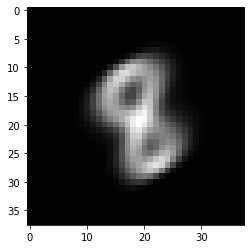

In [210]:
ave_num_pic(8, 30)

### PCA - dim reduction

In [21]:
from sklearn.decomposition import PCA

In [22]:
pca = PCA(n_components=X_train.shape[1])
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

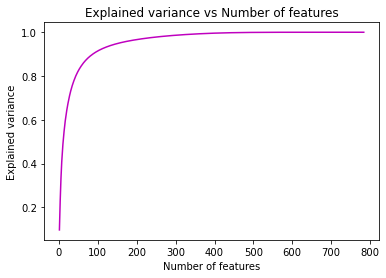

In [23]:
plt.plot(range(1,785), np.cumsum(pca.explained_variance_ratio_), "m")
plt.xlabel('Number of features')
plt.ylabel('Explained variance')
plt.title('Explained variance vs Number of features')
plt.show()

In [76]:
#model.fit(X_train_pca, y_train)

Accuracy after transformation

In [55]:
model_acc(model, X_train_pca, X_test_pca, y_train, y_test)

Train accuracy:  99.55
Test accuracy:   94.55


Function which calculates how many features do we need to reach a certain values of exp_var

In [48]:
def exp_var(percent):
    n = pca.explained_variance_ratio_.shape[0]
    for i in range(n):
        explained = np.cumsum(pca.explained_variance_ratio_)[i]
        if explained > percent/100:
            return(i)

Let's check accuracy values for different values of exp_var

In [58]:
# exp_var = 70%
n_feat = exp_var(70)
n_feat

25

In [63]:
X_tr_25 = X_train_pca[:, :n_feat]
X_ts_25 = X_test_pca[:, :n_feat]

In [61]:
#model.fit(X_tr_25, y_train)

In [62]:
model_acc(model, X_tr_25, X_ts_25, y_train, y_test)

Train accuracy:  96.68
Test accuracy:   95.9


In [64]:
# exp_var = 90%
n_feat = exp_var(90)
n_feat

86

In [65]:
X_tr_86 = X_train_pca[:, :n_feat]
X_ts_86 = X_test_pca[:, :n_feat]

In [68]:
#model.fit(X_tr_86, y_train)

In [69]:
model_acc(model, X_tr_86, X_ts_86, y_train, y_test)

Train accuracy:  98.15
Test accuracy:   95.86


In [70]:
# exp_var = 80%
n_feat = exp_var(80)
n_feat

42

In [71]:
X_tr_42 = X_train_pca[:, :n_feat]
X_ts_42 = X_test_pca[:, :n_feat]

In [73]:
#model.fit(X_tr_42, y_train)

In [74]:
model_acc(model, X_tr_42, X_ts_42, y_train, y_test)

Train accuracy:  97.36
Test accuracy:   96.42


In [75]:
import sklearn.metrics as skmet

In [79]:
pred = model.predict(X_ts_42)

In [80]:
print(skmet.confusion_matrix(y_test, pred))

[[1340    1    4    2    4   13   10    2    4    8]
 [   0 1526    7    2    3    2    1    2    2    1]
 [   3    5 1359    3   10    0    2    9    7    4]
 [   2    3   16 1294    2   27    2    8   17    4]
 [   0    1    0    0 1378    0    4    7    2   14]
 [   3    3    3    7    2 1276   15    3    4    4]
 [   0    3    0    0   13   10 1360    1    7    0]
 [   1    4   11    7    7    2    2 1377    3   13]
 [   1    1   14   15    4   16    4    2 1253    5]
 [   5    2    0    5   31   21    0   12   15 1336]]


In [81]:
print(skmet.classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1388
           1       0.99      0.99      0.99      1546
           2       0.96      0.97      0.97      1402
           3       0.97      0.94      0.95      1375
           4       0.95      0.98      0.96      1406
           5       0.93      0.97      0.95      1320
           6       0.97      0.98      0.97      1394
           7       0.97      0.96      0.97      1427
           8       0.95      0.95      0.95      1315
           9       0.96      0.94      0.95      1427

    accuracy                           0.96     14000
   macro avg       0.96      0.96      0.96     14000
weighted avg       0.96      0.96      0.96     14000



How does the different layers and coefficients looks like?

In [82]:
model.coefs_[0].shape

(42, 32)

In [83]:
model.coefs_[1].shape

(32, 10)

In [84]:
model.intercepts_[0].shape

(32,)

Wrong predictions distribution

In [95]:
n = pred.shape[0]
flase_list = []
for i in range(1, n):
    if list(pred != y_test)[i]:
        flase_list.append(i)

In [97]:
mis_pred = y_test.take(flase_list).to_frame()

In [98]:
mis_pred.value_counts()

digit
9        91
3        81
8        62
7        50
0        48
5        44
2        43
6        34
4        28
1        20
dtype: int64

Mispredicted numbers ratio

In [100]:
round(100*mis_pred.value_counts()/len(mis_pred), 2)

digit
9        18.16
3        16.17
8        12.38
7         9.98
0         9.58
5         8.78
2         8.58
6         6.79
4         5.59
1         3.99
dtype: float64

Mispredicted numbers out of the entire test set

In [103]:
N = X_test.shape[0]

In [104]:
round(100*mis_pred.value_counts()/N, 2)

digit
9        0.65
3        0.58
8        0.44
7        0.36
0        0.34
5        0.31
2        0.31
6        0.24
4        0.20
1        0.14
dtype: float64

### Second model - CNN

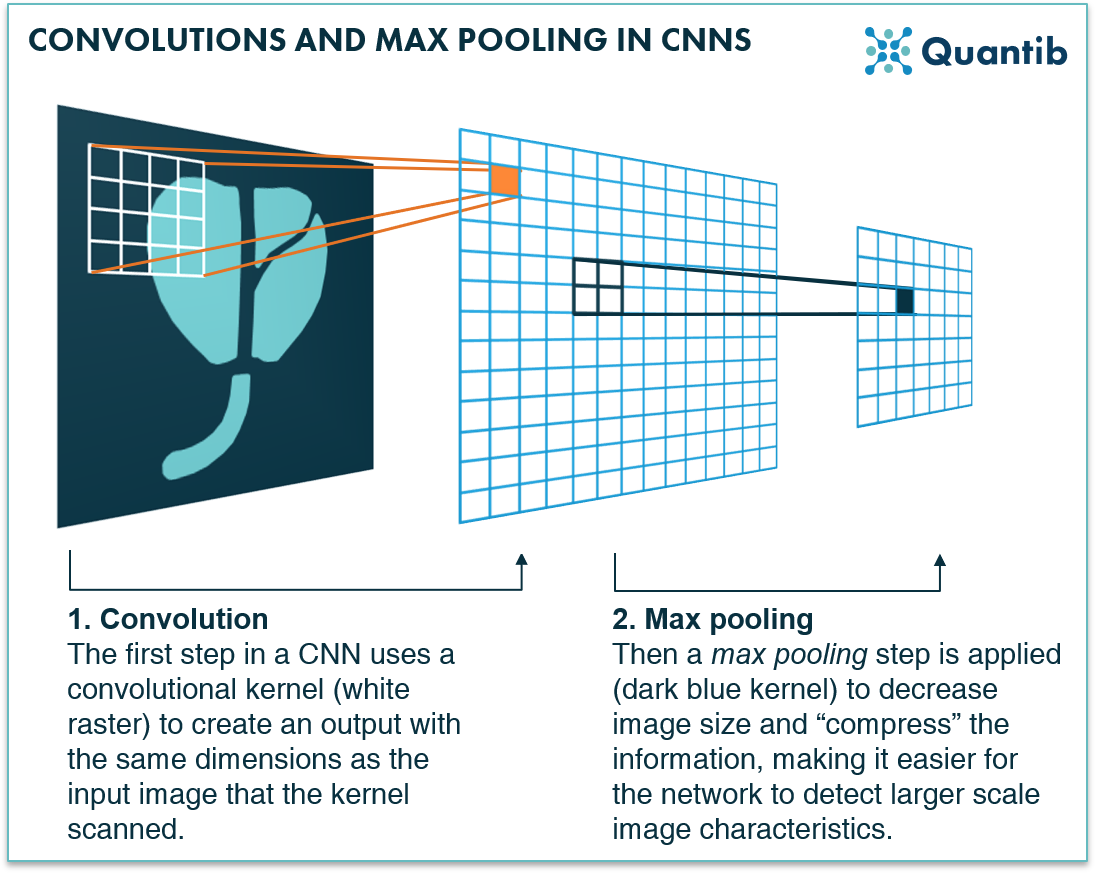

In [108]:
from IPython.display import Image
Image(filename='CNN.png',width=600)

In [109]:
df.head(2)

,digit,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [120]:
x_train, x_test, y_train, y_test = skmodel.train_test_split(df.drop('digit',axis=1),
                                                            df['digit'], test_size=0.2, random_state=101)

In [121]:
x_train = x_train.values
x_test = x_test.values
y_train = y_train.values
y_test = y_test.values

In [123]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

input_shape = (28, 28, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (55998, 28, 28, 1)
Number of images in x_train 55998
Number of images in x_test 14000


In [146]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(5,5), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) 

model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))

model.add(Dense(10,activation=tf.nn.softmax))

In [147]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train, y=y_train, epochs=10)

In [143]:
model.evaluate(x_test, y_test)

438/438 [==============================] - 1s 2ms/step - loss: 0.0566 - accuracy: 0.9830


[0.05662969499826431, 0.9829999804496765]

In [150]:
def model_acc(model, x_train, x_test, y_train, y_test):
    
    pred_train = model.predict(x_train)
    pred_test = model.predict(x_test)
    
    acc_train = round(100*(1 - np.mean(np.argmax(pred_train, axis=1) != y_train)), 2)
    acc_test = round(100*(1 - np.mean(np.argmax(pred_test, axis=1) != y_test)), 2)
    
    print('Train accuracy: ', acc_train)
    print('Test accuracy:  ', acc_test)
    return acc_train, acc_test

- Neurons = 128
- Dropout = 0.2
- Epochs = 10

In [135]:
model_acc(model, x_train, x_test, y_train, y_test)

Train accuracy:  99.45
Test accuracy:   98.45


### Iterating over the number of epochs

In [151]:
acc_test_list = []
acc_train_list = []
for i in range(1,16):
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    model.fit(x=x_train,y=y_train, epochs=i)
    acc_train, acc_test = model_acc(model, x_train, x_test, y_train, y_test)
    acc_test_list.append(acc_test)
    acc_train_list.append(acc_train)

1750/1750 [==============================] - 10s 5ms/step - loss: 0.1328 - accuracy: 0.9595
Train accuracy:  97.38
Test accuracy:   96.86
Epoch 1/2
1750/1750 [==============================] - 10s 6ms/step - loss: 0.1049 - accuracy: 0.9680
Epoch 2/2
1750/1750 [==============================] - 12s 7ms/step - loss: 0.0880 - accuracy: 0.9727
Train accuracy:  98.25
Test accuracy:   97.48
Epoch 1/3
1750/1750 [==============================] - 12s 7ms/step - loss: 0.0773 - accuracy: 0.9761
Epoch 2/3
1750/1750 [==============================] - 12s 7ms/step - loss: 0.0697 - accuracy: 0.9787
Epoch 3/3
1750/1750 [==============================] - 12s 7ms/step - loss: 0.0610 - accuracy: 0.9811
Train accuracy:  98.91
Test accuracy:   98.09
Epoch 1/4
1750/1750 [==============================] - 12s 7ms/step - loss: 0.0557 - accuracy: 0.9824
Epoch 2/4
1750/1750 [==============================] - 12s 7ms/step - loss: 0.0506 - accuracy: 0.9842
Epoch 3/4
1750/1750 [==============================] - 1

1750/1750 [==============================] - 12s 7ms/step - loss: 0.0054 - accuracy: 0.9980
Epoch 11/12
1750/1750 [==============================] - 12s 7ms/step - loss: 0.0052 - accuracy: 0.9982
Epoch 12/12
1750/1750 [==============================] - 12s 7ms/step - loss: 0.0056 - accuracy: 0.9980
Train accuracy:  99.99
Test accuracy:   98.79
Epoch 1/13
1750/1750 [==============================] - 12s 7ms/step - loss: 0.0054 - accuracy: 0.9981
Epoch 2/13
1750/1750 [==============================] - 12s 7ms/step - loss: 0.0052 - accuracy: 0.9982
Epoch 3/13
1750/1750 [==============================] - 12s 7ms/step - loss: 0.0058 - accuracy: 0.9978
Epoch 4/13
1750/1750 [==============================] - ETA: 0s - loss: 0.0049 - accuracy: 0.99 - 12s 7ms/step - loss: 0.0049 - accuracy: 0.9985
Epoch 5/13
1750/1750 [==============================] - 12s 7ms/step - loss: 0.0059 - accuracy: 0.9979
Epoch 6/13
1750/1750 [==============================] - 12s 7ms/step - loss: 0.0049 - accuracy: 0

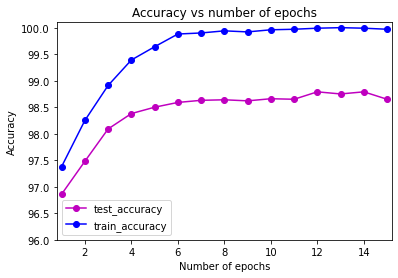

In [169]:
plt.figure()
line1 = plt.plot(np.arange(1,16), acc_test_list, color='m' ,marker='o', label='test_accuracy')
line2 = plt.plot(np.arange(1,16), acc_train_list, color='b', marker='o', label='train_accuracy')
plt.title('Accuracy vs number of epochs')
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')
plt.xlim([0.8,15.2])
plt.ylim([96,100.1])
plt.legend()
plt.show()

In [157]:
pred_test = model.predict(x_test)

In [159]:
skmet.confusion_matrix(y_test, np.argmax(pred_test, axis=1))

array([[1367,    0,    4,    0,    0,    1,    8,    0,    6,    2],
       [   0, 1529,    4,    2,    2,    1,    2,    2,    3,    1],
       [   2,    2, 1382,    3,    7,    0,    0,    2,    2,    2],
       [   0,    0,    3, 1363,    0,    2,    0,    2,    4,    1],
       [   1,    1,    1,    0, 1389,    0,    5,    0,    3,    6],
       [   4,    1,    0,    3,    1, 1302,    4,    0,    4,    1],
       [   3,    0,    0,    0,    3,    3, 1382,    0,    3,    0],
       [   0,    0,   12,    3,    4,    3,    1, 1392,    4,    8],
       [   1,    1,    0,    0,    3,    3,    2,    0, 1301,    4],
       [   2,    0,    0,    4,    8,    4,    0,    1,    4, 1404]],
      dtype=int64)

In [161]:
print(skmet.classification_report(y_test, np.argmax(pred_test,axis=1)))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1388
           1       1.00      0.99      0.99      1546
           2       0.98      0.99      0.98      1402
           3       0.99      0.99      0.99      1375
           4       0.98      0.99      0.98      1406
           5       0.99      0.99      0.99      1320
           6       0.98      0.99      0.99      1394
           7       0.99      0.98      0.99      1427
           8       0.98      0.99      0.98      1315
           9       0.98      0.98      0.98      1427

    accuracy                           0.99     14000
   macro avg       0.99      0.99      0.99     14000
weighted avg       0.99      0.99      0.99     14000



## <font color='blue'>Summary</font>  
- Digits can be recognized from images with high accuracies.
- Using the MLP classifier with one hidden-layer and 32 neurons the results were 97.4% and 94.1% for train and test respectively.
- Using PCA method only 43 features were used to obtain 96.7% and 96.0% for train and test respectively. 
- The probability of mispredict specific numbers was investigated. The worst predicted number is 9, and the best is 1.
- CNN was used with 32 filters, kernel_size of 5x5, and max_pooling layer of 2x2.
- One layer of 128 neurons, relu function, and dropuot layer of 0.2 were used.
- The accuracy of test and train sets were tested versos the number of epochs.
- The "knee point" was observed after ~4 epochs with accuracy of 99.4% and 98.4% for train and test respectively.
- After 6 epochs the plots were flattened. Accuracy of 99.9% and 98.6% for train and test respectively were calculated.

## Conclusions
- PCA method improved the test accuracy and reduced the overfitting problem.
- CNN model performed better than MLP even after one epoch.
- The accuracy for train and test were improved by ~3% and ~2% respectively.
- Fine tuning of different hyper-parameters can further improve the results. 